In [1]:
import os, sys, fnmatch
from astropy.io import fits
from astropy.table import Table, vstack
import numpy as np
import matplotlib
import pylab as plt
%matplotlib inline

In [2]:
data_path = os.path.abspath('../../Data/data_cfhtlens_bins.fits')

In [6]:
with fits.open(data_path) as fn:
    print fn.info()
    photoz_z = fn['photoz_z'].data
    photoz_p = fn['photoz_p'].data
    cls = fn['cls'].data
    cls_kl = fn['cls_kl'].data
    kl_t = fn['kl_t'].data
    noise = fn['noise'].data

NUM_ELL = len(cls)
NUM_BINS = len(photoz_p)

Filename: /home/bellini/Codes/zbins_wl_lsst.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       4   ()      
  1  N_EFF       ImageHDU         7   (16,)   float64   
  2  SIGMA_G     ImageHDU         7   (16,)   float64   
  3  PHOTOZ_Z    ImageHDU         7   (1024,)   float64   
  4  PHOTOZ_P    ImageHDU         8   (1024, 16)   float64   
  5  CLS         ImageHDU         9   (16, 16, 2001)   float64   
  6  KL_T        ImageHDU         9   (16, 16, 2001)   float64   
  7  NOISE       ImageHDU         9   (16, 16, 2001)   float64   
  8  CLS_KL      ImageHDU         9   (16, 16, 2001)   float64   
None


## Photo-z

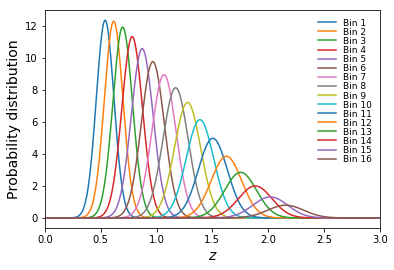

In [16]:
x = photoz_z
for count in range(NUM_BINS):
    y = photoz_p[count]
    plt.plot(x, y, label = 'Bin ' + str(count+1))

plt.xlim(0.,3.)

plt.xlabel('$z$', fontsize=14)
plt.ylabel('Probability distribution', fontsize=14)
plt.legend(loc="upper right", frameon = False, fontsize=9, labelspacing=0.01)
plt.show()

## Cl's

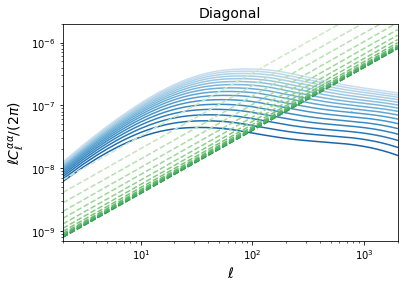

In [29]:
cm = [plt.get_cmap('Blues'), plt.get_cmap('Greens')]
x = np.arange(2,NUM_ELL)
for count in range(NUM_BINS):
    y = np.array([cls[ell][count][count] for ell in x])
    plt.plot(x, x*y/(2*3.14), label = 'Bin ' + str(count+1),
            color=cm[0](0.2+0.6*(1.-float(count)/float(NUM_BINS))))
for count in range(NUM_BINS):
    y = np.array([noise[ell][count][count] for ell in x])
    plt.plot(x, x*y/(2*3.14), label = 'Bin ' + str(count+1),
            color=cm[1](0.2+0.6*(1.-float(count)/float(NUM_BINS))),
            linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.xlim(2., NUM_ELL-1)
plt.ylim(7e-10,2e-6)

plt.xlabel('$\\ell$', fontsize=14)
plt.ylabel('$\\ell C_\\ell^{\\alpha\\alpha}/(2\\pi)$', fontsize=14)
#plt.legend(loc="lower right", frameon = False, fontsize=9, labelspacing=0.01)
plt.title('Diagonal', fontsize=14)
plt.show()

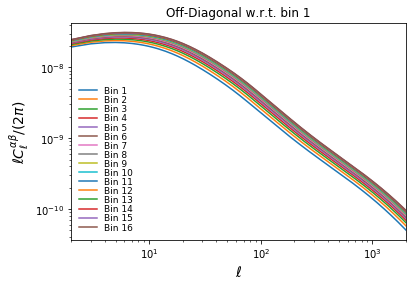

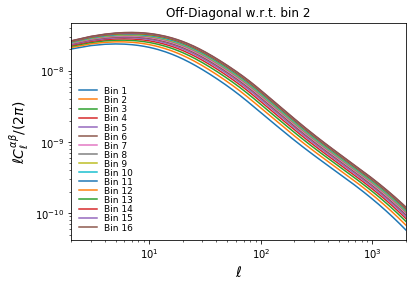

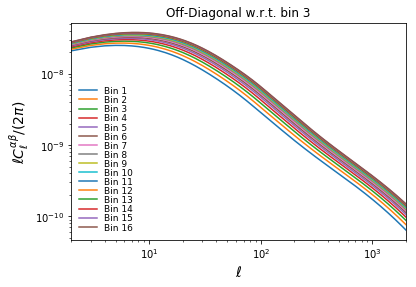

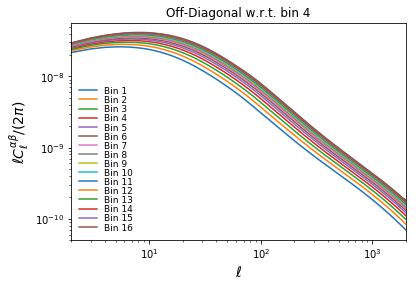

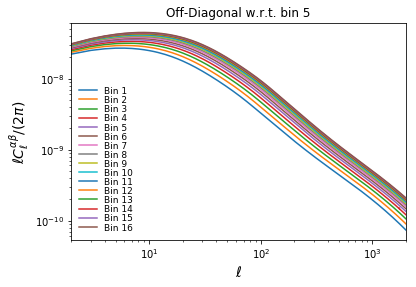

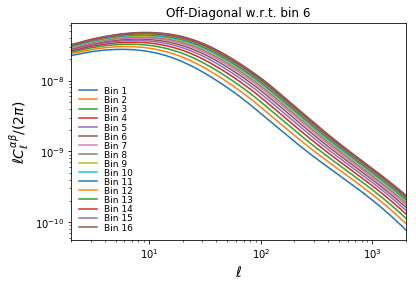

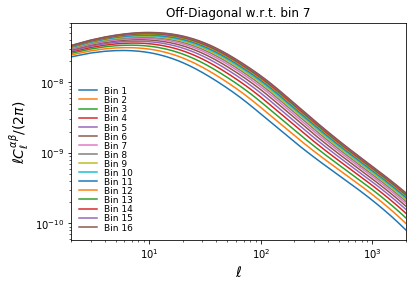

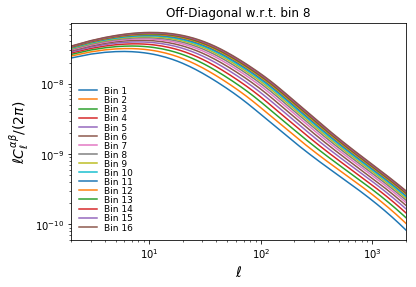

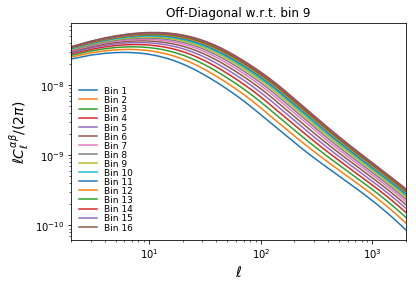

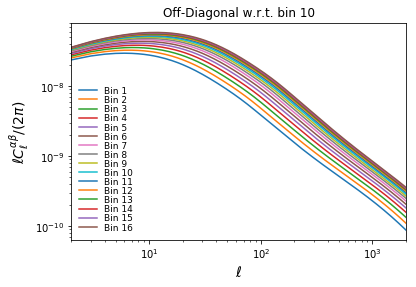

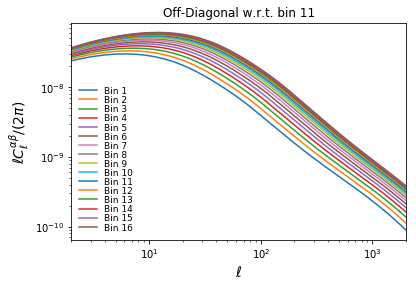

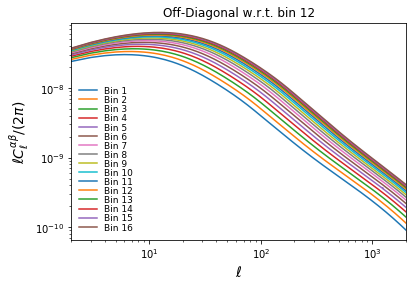

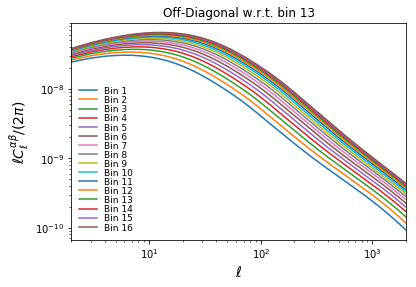

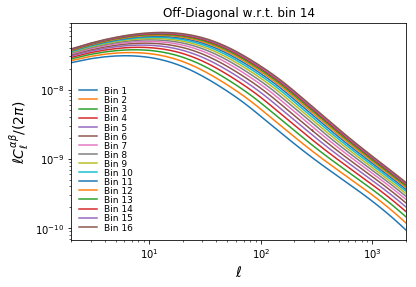

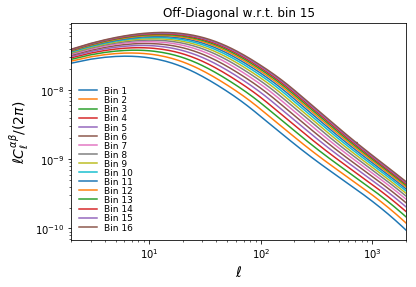

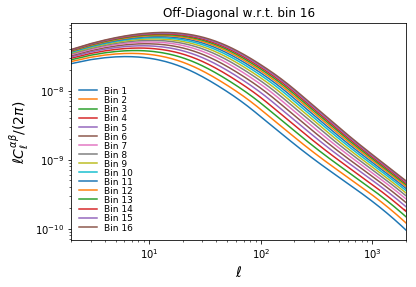

In [19]:
x = np.arange(2,NUM_ELL)
for count1 in range(NUM_BINS):
    for count2 in range(NUM_BINS):
        y = [cls[ell][count1][count2] for ell in x]
        plt.plot(x,y, label = 'Bin ' + str(count2+1))

    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(2., NUM_ELL-1)

    plt.xlabel('$\\ell$', fontsize=14)
    plt.ylabel('$\\ell C_\\ell^{\\alpha\\beta}/(2\\pi)$', fontsize=14)
    plt.title('Off-Diagonal w.r.t. bin ' + str(count1+1))
    plt.legend(loc="lower left", frameon = False, fontsize=9, labelspacing=0.01)
    plt.show()

## KL eigenvalues

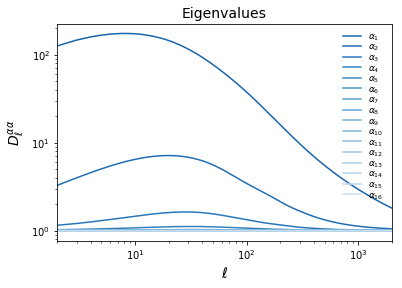

In [20]:
cm = plt.get_cmap('Blues')

x = np.arange(2,NUM_ELL)
for count in range(NUM_BINS):
    y = [cls_kl[ell][count][count] for ell in x]
    plt.plot(x, y, label=r'$\alpha_{'+str(count+1)+'}$',
            color=cm(0.2+0.6*(1.-float(count)/float(NUM_BINS))))

plt.xscale('log')
plt.yscale('log')
plt.xlim(2., NUM_ELL-1)

plt.xlabel('$\\ell$', fontsize=14)
plt.ylabel('$D_\\ell^{\\alpha\\alpha}$', fontsize=14)
plt.title('Eigenvalues', fontsize=14)
plt.legend(loc="upper right", frameon = False, fontsize=9, labelspacing=0.01)
plt.show()

## KL eigenvectors

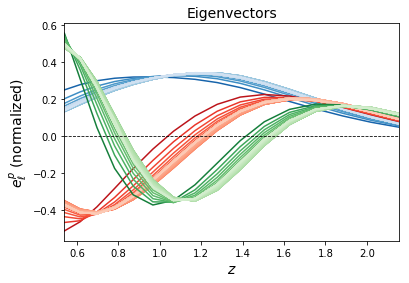

In [23]:
NUM_EG = 3
cm = [plt.get_cmap('Blues'),plt.get_cmap('Reds'),plt.get_cmap('Greens')]

x = np.array([np.average(photoz_z, weights=x) for x in photoz_p])
for count in range(NUM_EG):
    for ell in range(2,2000,10):
        if count==2:
            y = -kl_t[ell][count]/np.linalg.norm(kl_t[ell][count])
        else:
            y = kl_t[ell][count]/np.linalg.norm(kl_t[ell][count])
        plt.plot(x, y,
                color=cm[count](0.2+0.6*np.log(float(ell)/float(NUM_ELL))/np.log(2./float(NUM_ELL))))
plt.plot(x,np.zeros(len(x)),'k--', linewidth=0.8)

plt.xlim(x.min(),x.max())

plt.xlabel('$z$', fontsize=14)
plt.ylabel('$e_\\ell^p$ (normalized)', fontsize=14)
plt.title('Eigenvectors', fontsize=14)
plt.show()